In [19]:
# Load libs

library(dplyr)
library(ggplot2)
library(ggthemes)
library(tidyr)
library(forecast)

In [2]:
# Load monthly accounts data from beginning of time

df<-read.csv(file = 'Accounts Forecasting Monthly Input.csv')
df$date<-as.Date(df$date)

df%>%tail()

,date,Total.Accounts,Accounts.dv,Accounts.TV,Accounts.TV.mobile,Accounts.TV.dktp,Accounts.mobile,Accounts.excl.dv
49,2018-01-01,186448,6484,9478,4739,4739,53775,179964
50,2018-02-01,170474,6350,8405,4203,4203,48299,164124
51,2018-03-01,213383,7670,9388,4694,4694,53933,205713
52,2018-04-01,232126,6270,30526,15263,15263,60097,225856
53,2018-05-01,325234,7740,41364,20682,20682,96464,317494
54,2018-06-01,369861,7867,32436,16218,16218,117210,361994


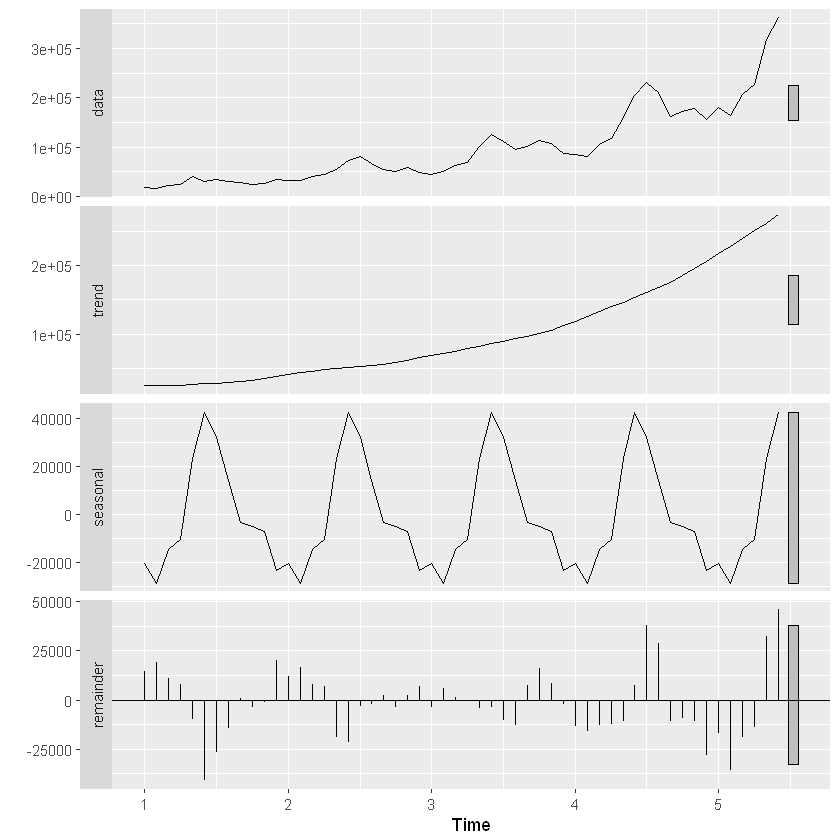

In [3]:
# Time series decomp using accounts

accounts_ts<-ts(data = df$Accounts.excl.dv,frequency = 12)
autoplot(stl(x = accounts_ts,s.window = 'periodic'))

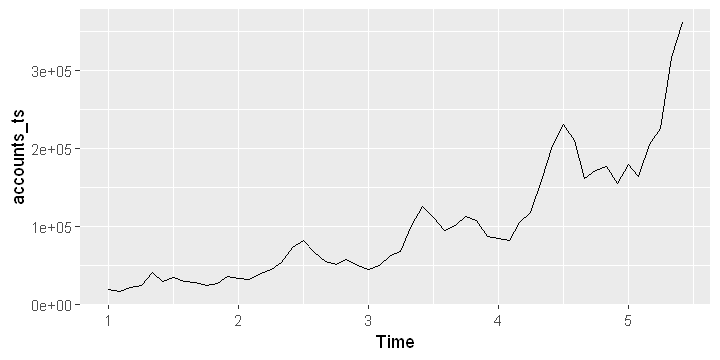

In [4]:
# Plot Accounts trend

options(repr.plot.height=3,repr.plot.width=6)
autoplot(accounts_ts)

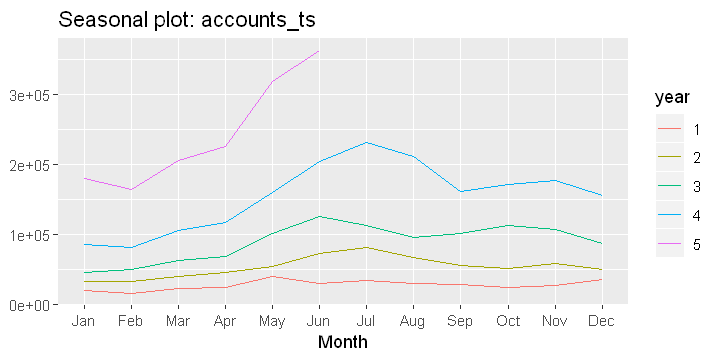

In [5]:
# Detect seasonality

forecast::ggseasonplot(accounts_ts)


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(0,1,0)[12]
Q* = 15.443, df = 10.8, p-value = 0.1531

Model df: 0.   Total lags used: 10.8

Series: accounts_ts 
ARIMA(0,1,0)(0,1,0)[12] 

sigma^2 estimated as 3.13e+08:  log likelihood=-459.19
AIC=920.38   AICc=920.48   BIC=922.09

Training set error measures:
                   ME     RMSE     MAE      MPE    MAPE      MASE       ACF1
Training set 2672.017 15414.93 9288.09 1.158842 8.20429 0.1748685 0.06815215


[1]  0  0  0  0 12  1  1

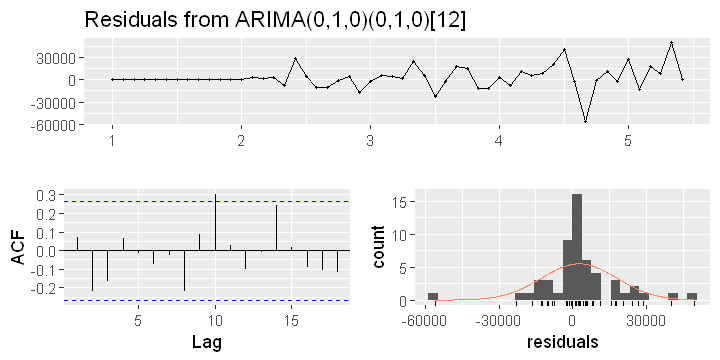

In [6]:
# ARIMA of accounts ts

arima<-auto.arima(accounts_ts)

checkresiduals(arima)
summary(arima)

options(repr.plot.height=5,repr.plot.width=8)
arima$arma

date,Total.Accounts,Accounts.dv,Accounts.TV,Accounts.TV.mobile,Accounts.TV.dktp,Accounts.mobile,Accounts.excl.dv,fitted_accounts
2014-01-01,19173,NA,NA,NA,NA,NA,19173,19161.93
2014-02-01,15864,NA,NA,NA,NA,NA,15864,15861.61
2014-03-01,22114,NA,NA,NA,NA,NA,22114,22107.15
2014-04-01,23770,NA,NA,NA,NA,NA,23770,23763.44
2014-05-01,40357,NA,NA,NA,NA,NA,40357,40336.76
2014-06-01,29759,NA,NA,NA,NA,NA,29759,29751.91


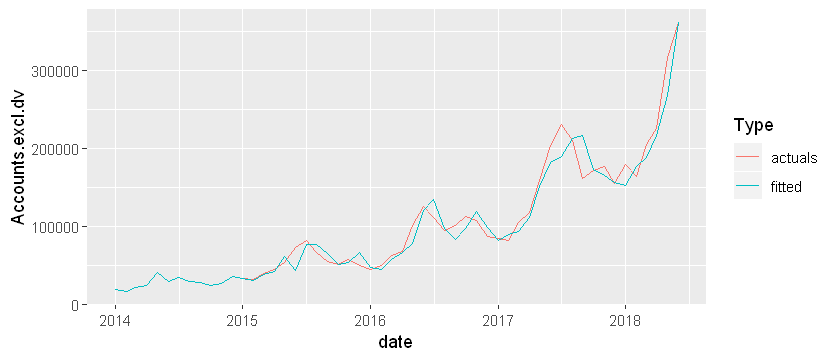

In [7]:
# Examine ARIMA model fit

options(repr.plot.height=3,repr.plot.width=7)
options(scipen=5)

plt_df<-df
plt_df$fitted_accounts = fitted(arima)
plt_df%>%head()

plt_df%>%ggplot() + geom_line(mapping = aes(x=date,y=Accounts.excl.dv,color='actuals')) + 
geom_line(mapping = aes(x=date,y=fitted_accounts,color ='fitted')) +
scale_color_discrete(name = 'Type')

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jul 5         388805 366133.4 411476.6 354131.7 423478.3
Aug 5         369104 337041.5 401166.5 320068.6 418139.4
Sep 5         319734 280465.6 359002.4 259678.2 379789.8
Oct 5         329695 284351.8 375038.2 260348.5 399041.5
Nov 5         335835 285139.7 386530.3 258303.3 413366.7
Dec 5         313323 257789.1 368856.9 228391.2 398254.8
Jan 6         338298 278314.5 398281.5 246561.2 430034.8
Feb 6         322458 258333.0 386583.0 224387.2 420528.8
Mar 6         364047 296032.1 432061.9 260027.2 468066.8
Apr 6         384190 312496.0 455884.0 274543.6 493836.4
May 6         475828 400634.7 551021.3 360829.8 590826.2
Jun 6         520328 441791.2 598864.8 400216.3 640439.7
Jul 6         547139 456452.5 637825.5 408446.0 685832.0
Aug 6         527438 426047.4 628828.6 372374.5 682501.5
Sep 6         478068 367000.2 589135.8 308204.5 647931.5
Oct 6         488029 368062.1 607995.9 304555.4 671502.6
Nov 6         494169 365918.9 6

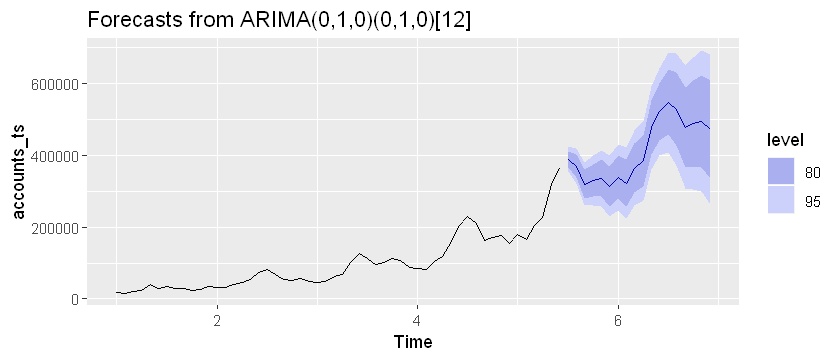

In [8]:
# Future forecasting using ARIMA model

pred<-forecast::forecast(object = arima,h = 18)
pred

autoplot(pred)

In [9]:
#Export prediction data

write.csv(pred, file = "AccountsPredicted.csv")

## With TV as predictor

In [10]:
# Load weekly data year-to-date

df_wkly<-read.csv(file = 'Accounts Forecasting Weekly Input.csv')
df_wkly$week<-as.Date(df_wkly$week)

df_wkly%>%tail() #jan-18 starts in row 18

,week,tv_spend,tv_impressions,tv_sitter_intent,total_accounts,total_sitter_intent,sitter_intent_perc
40,2018-06-04,322557,65124,6146,92629,49042,0.5294454
41,2018-06-11,277557,59766,5706,92218,48011,0.5206250
42,2018-06-18,180756,44004,4539,82663,41966,0.5076757
43,2018-06-25,0,0,2385,77967,35093,0.4501007
44,2018-07-02,0,0,1746,75377,32274,0.4281677
45,2018-07-09,323625,0,1549,46045,20218,0.4390922


In [11]:
df_wkly <- head(df_wkly,44)
df_wkly%>%head()
df_wkly%>%tail()

week,tv_spend,tv_impressions,tv_sitter_intent,total_accounts,total_sitter_intent,sitter_intent_perc
2017-09-04,0,0,197,33293,9706,0.2915328
2017-09-11,0,0,304,39652,14603,0.3682790
2017-09-18,139999,0,724,43590,19543,0.4483368
2017-09-25,139987,0,748,41000,17792,0.4339512
2017-10-02,139991,0,856,42430,17543,0.4134575
2017-10-09,140008,0,791,41430,17022,0.4108617


,week,tv_spend,tv_impressions,tv_sitter_intent,total_accounts,total_sitter_intent,sitter_intent_perc
39,2018-05-28,632472,102068,7363,82908,42886,0.5172722
40,2018-06-04,322557,65124,6146,92629,49042,0.5294454
41,2018-06-11,277557,59766,5706,92218,48011,0.5206250
42,2018-06-18,180756,44004,4539,82663,41966,0.5076757
43,2018-06-25,0,0,2385,77967,35093,0.4501007
44,2018-07-02,0,0,1746,75377,32274,0.4281677


In [12]:
# Time series decomp using total weekly accounts

wkly_accounts_ts<-ts(df_wkly$total_accounts,frequency = 52, start=1)

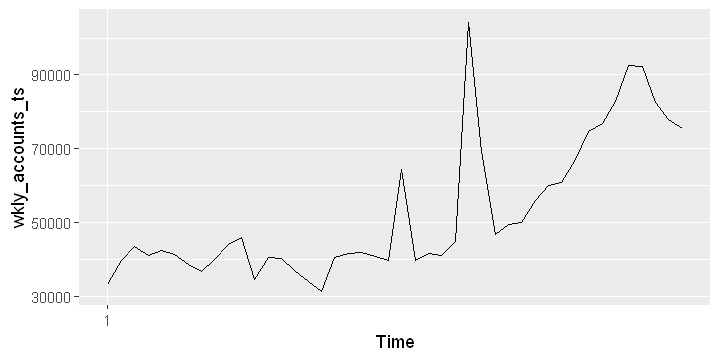

In [13]:
options(repr.plot.height=3,repr.plot.width=6)
autoplot(wkly_accounts_ts,ts.scale =T)

Warning message in value[[3L]](cond):
"The chosen test encountered an error, so no seasonal differencing is selected. Check the time series data."


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,0,1)[52] with drift
Q* = 9.4291, df = 5.8, p-value = 0.1381

Model df: 3.   Total lags used: 8.8

Series: wkly_accounts_ts 
ARIMA(0,1,1)(0,0,1)[52] with drift 

Coefficients:
          ma1      sma1      drift
      -0.7102    0.0000  1067.2872
s.e.   0.1575  426.4169   556.4773

sigma^2 estimated as 150135961:  log likelihood=-464.59
AIC=937.18   AICc=938.24   BIC=944.23

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE      ACF1
Training set 62.22541 11682.78 7292.651 -3.682548 13.11589  NaN 0.2069205


[1]  0  1  0  1 52  1  0

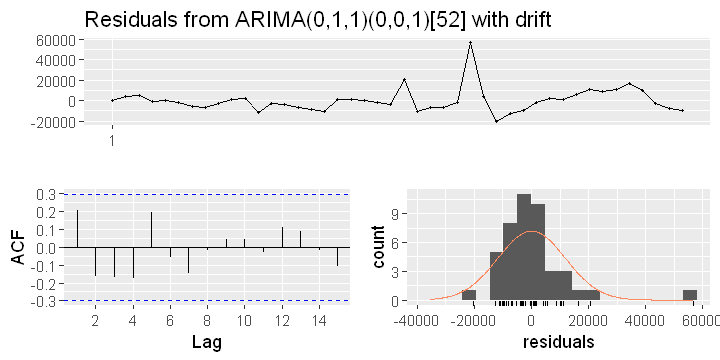

In [14]:
# ARIMA of WEEKLY accounts ts

arima_wkly<-auto.arima(wkly_accounts_ts)

checkresiduals(arima_wkly)
summary(arima_wkly)

options(repr.plot.height=5,repr.plot.width=8)
arima_wkly$arma

Warning message in value[[3L]](cond):
"The chosen test encountered an error, so no seasonal differencing is selected. Check the time series data."


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,0,1)[52] with drift
Q* = 9.4291, df = 5.8, p-value = 0.1381

Model df: 3.   Total lags used: 8.8

Series: wkly_accounts_ts 
Regression with ARIMA(0,1,1) errors 

Coefficients:
          ma1    xreg
      -0.6000  0.2328
s.e.   0.1456  0.1095

sigma^2 estimated as 140375693:  log likelihood=-463.55
AIC=933.1   AICc=933.72   BIC=938.38

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE MASE       ACF1
Training set 2237.963 11436.98 6333.436 1.061912 10.91387  NaN 0.05764477


[1]  0  1  0  0 52  1  0

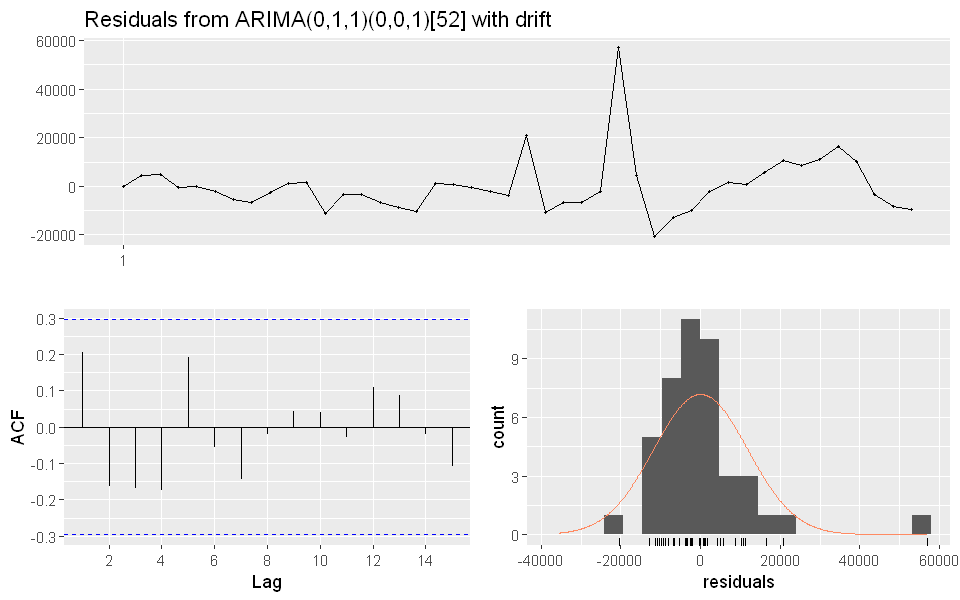

In [15]:
# Include TV impressions as a predictor

arima_wkly_xreg<-auto.arima(wkly_accounts_ts,xreg=df_wkly[,3])

checkresiduals(arima_wkly)
summary(arima_wkly_xreg)

options(repr.plot.height=5,repr.plot.width=8)
arima_wkly_xreg$arma

week,tv_spend,tv_impressions,tv_sitter_intent,total_accounts,total_sitter_intent,sitter_intent_perc,fitted
2017-09-04,0,0,197,33293,9706,0.2915328,33259.71
2017-09-11,0,0,304,39652,14603,0.3682790,34199.24
2017-09-18,139999,0,724,43590,19543,0.4483368,37146.56
2017-09-25,139987,0,748,41000,17792,0.4339512,39912.73
2017-10-02,139991,0,856,42430,17543,0.4134575,40368.84
2017-10-09,140008,0,791,41430,17022,0.4108617,41200.41


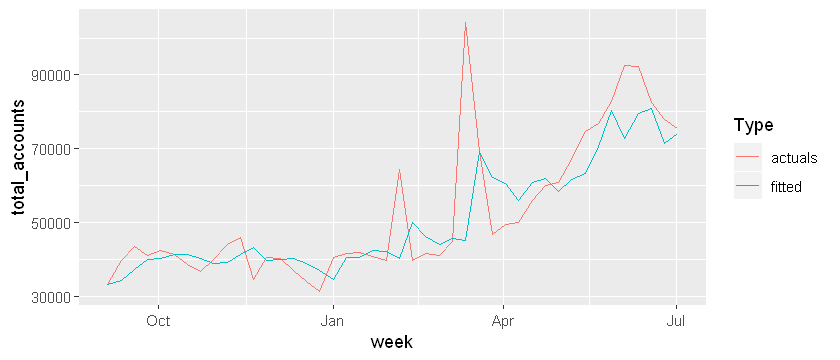

In [16]:
# Examine ARIMA model fit

options(repr.plot.height=3,repr.plot.width=7)
options(scipen=5)

plt_df<-df_wkly
plt_df$fitted = fitted(arima_wkly_xreg)
plt_df%>%head()

plt_df%>%ggplot() + geom_line(mapping = aes(x=week,y=total_accounts,color='actuals')) + 
geom_line(mapping = aes(x=week,y=fitted,color ='fitted')) +
scale_color_discrete(name = 'Type')

         Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
1.846154        82698.3 67514.45  97882.16 59476.60 105920.0
1.865385        82698.3 66344.91  99051.69 57687.95 107708.7
1.884615        82698.3 65253.61 100142.99 56018.95 109377.7
1.903846        82698.3 64226.67 101169.93 54448.38 110948.2
1.923077        82698.3 63253.89 102142.71 52960.64 112436.0
1.942308        82698.3 62327.52 103069.09 51543.87 113852.7
1.961538        82698.3 61441.47 103955.13 50188.79 115207.8
1.980769        82698.3 60590.91 104805.69 48887.97 116508.6
2.000000        82698.3 59771.88 105624.72 47635.37 117761.2
2.019231        82698.3 58981.12 106415.48 46426.01 118970.6
2.038462        82698.3 58215.89 107180.71 45255.69 120140.9
2.057692        82698.3 57473.86 107922.74 44120.85 121275.7
2.076923        82698.3 56753.05 108643.55 43018.46 122378.1
2.096154        82698.3 56051.72 109344.88 41945.88 123450.7

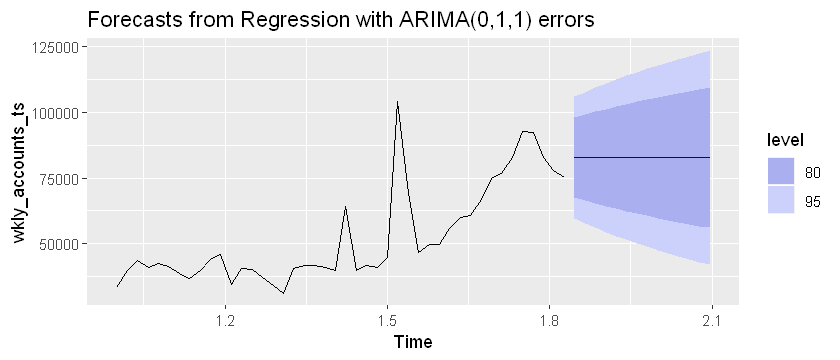

In [17]:
# Future forecasting using ARIMA model

pred_wkly<-forecast::forecast(object = arima_wkly_xreg,xreg = rep(35000,14)) #h = 18
pred_wkly

autoplot(pred_wkly) #+theme_dark()

In [18]:
plt_df_wkly$forecast = fcast$PointForecast
plt_df_wkly%>%head()

ERROR: Error in eval(expr, envir, enclos): object 'fcast' not found
